In [2]:
import os, sys; sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

import util.RAVDESS_dataset_util as Rd
import multimodal_vae
from train_mvae import build_model, train

from config_args import ConfigModelArgs, ConfigTrainArgs
import torch_mvae_util as U

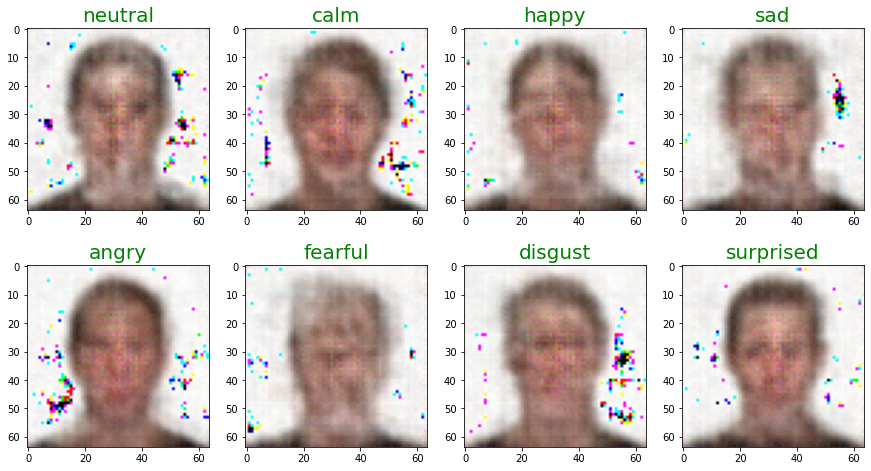

ravdess_InfoVAE_13_moe.save
{'cat_dim': 8, 'latent_space_dim': 100, 'hidden_dim': 128, 'num_filters': 32, 'loss_weights': {'face': 1.0, 'emotion': 1.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 0.0001, 'optim_betas': [0.5, 0.999], 'num_epochs': 25, 'batch_size': 64}


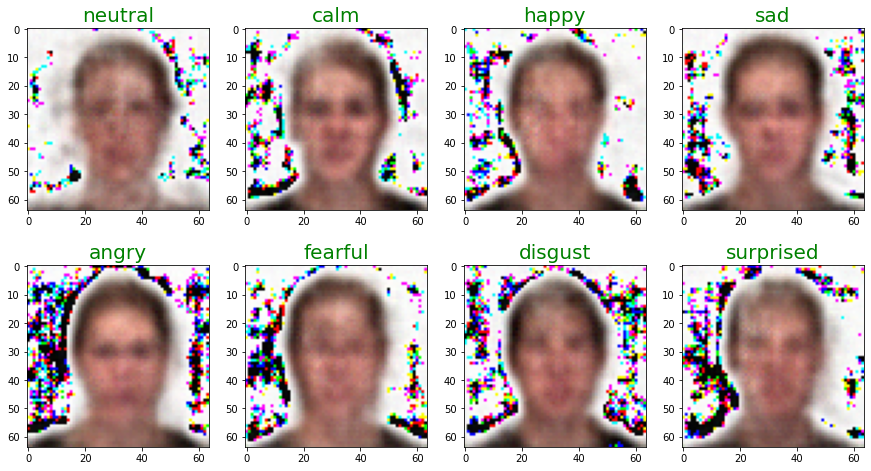

ravdess_InfoVAE_14_moe.save
{'cat_dim': 8, 'latent_space_dim': 50, 'hidden_dim': 128, 'num_filters': 32, 'loss_weights': {'face': 1.0, 'emotion': 50.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 0.0001, 'optim_betas': [0.5, 0.999], 'num_epochs': 25, 'batch_size': 64}


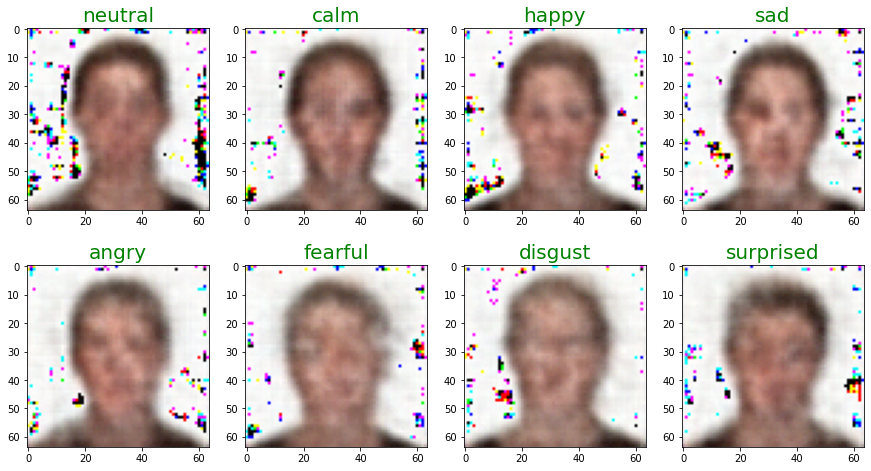

ravdess_InfoVAE_15_moe.save
{'cat_dim': 8, 'latent_space_dim': 50, 'hidden_dim': 128, 'num_filters': 16, 'loss_weights': {'face': 1.0, 'emotion': 50.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 0.0001, 'optim_betas': [0.95, 0.98], 'num_epochs': 25, 'batch_size': 64}


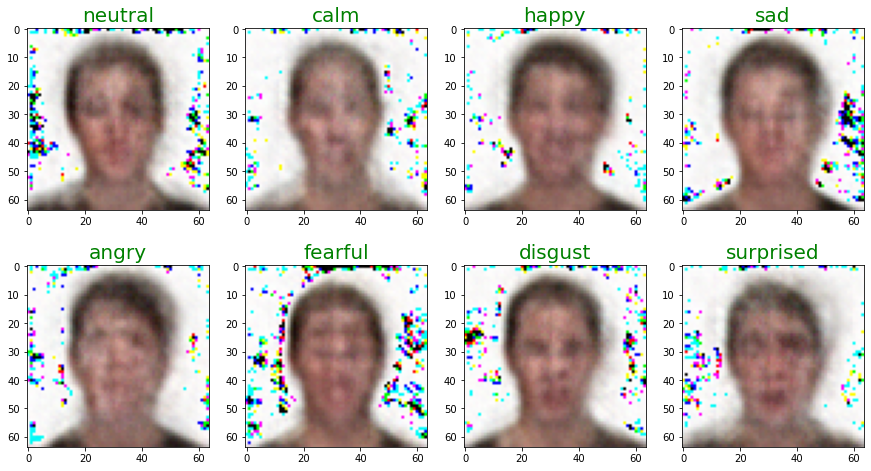

ravdess_InfoVAE_16_moe.save
{'cat_dim': 8, 'latent_space_dim': 50, 'hidden_dim': 128, 'num_filters': 64, 'loss_weights': {'face': 1.0, 'emotion': 50.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 0.0001, 'optim_betas': [0.95, 0.98], 'num_epochs': 25, 'batch_size': 64}


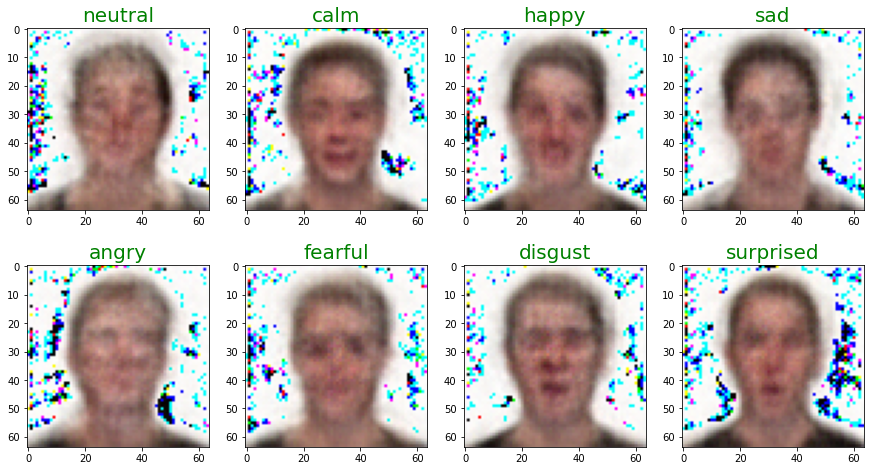

ravdess_InfoVAE_17_moe.save
{'cat_dim': 8, 'latent_space_dim': 50, 'hidden_dim': 128, 'num_filters': 128, 'loss_weights': {'face': 1.0, 'emotion': 50.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 0.0001, 'optim_betas': [0.95, 0.98], 'num_epochs': 25, 'batch_size': 64}


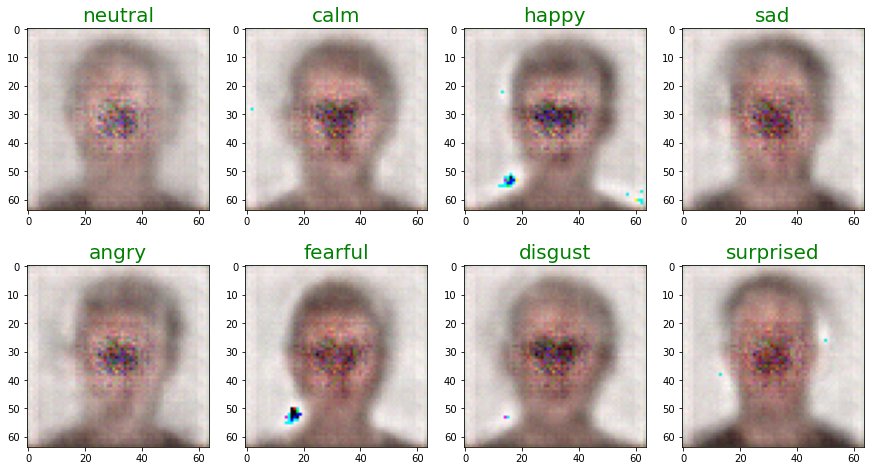

ravdess_InfoVAE_18_moe.save
{'cat_dim': 8, 'latent_space_dim': 50, 'hidden_dim': 128, 'num_filters': 128, 'loss_weights': {'face': 1.0, 'emotion': 50.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 1e-05, 'optim_betas': [0.95, 0.98], 'num_epochs': 25, 'batch_size': 64}


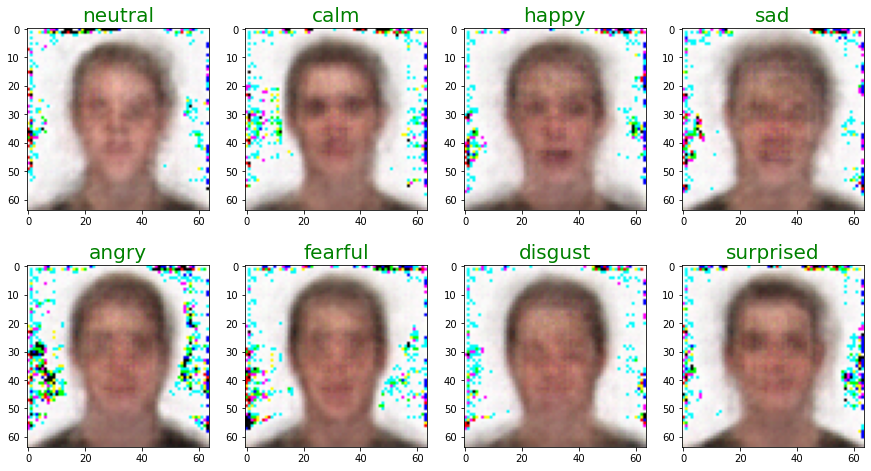

ravdess_InfoVAE_19_moe.save
{'cat_dim': 8, 'latent_space_dim': 100, 'hidden_dim': 128, 'num_filters': 256, 'loss_weights': {'face': 1.0, 'emotion': 50.0}, 'expert_type': 'moe', 'use_cuda': True}
{'learning_rate': 0.0001, 'optim_betas': [0.95, 0.98], 'num_epochs': 25, 'batch_size': 128}


In [4]:
folder_path = "../trained_models/"

model_names = ["ravdess_InfoVAE_13_moe.save",
               "ravdess_InfoVAE_14_moe.save",
               "ravdess_InfoVAE_15_moe.save",
               "ravdess_InfoVAE_16_moe.save",
               "ravdess_InfoVAE_17_moe.save",
               "ravdess_InfoVAE_18_moe.save",
               "ravdess_InfoVAE_19_moe.save",
              ]

for model_name in model_names:
    loaded_data = torch.load(folder_path + model_name)
    model_args = loaded_data['model_args']
    train_args = loaded_data['train_args']
    model: torch.nn.Module = build_model(**loaded_data['model_args']).double()
    model.load_state_dict(loaded_data['model_params'])
    
    img = U.display_recontructed_images(model, model_eval=True)
    print(model_name)
    print(model_args)
    print(train_args)